In [12]:
import numpy
from matplotlib import pyplot
import math
%matplotlib inline

In [13]:
N = 200
x_start, x_end = -4.0, 4.0
y_start, y_end = -2.0, 2.0
x = numpy.linspace(x_start, y_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [14]:
u_inf = 1.0

u_freestream = u_inf*numpy.ones((N, N))
v_freestream = numpy.zeros((N, N))

psi_freestream = u_inf*Y

In [15]:
def get_velocity(strength, xs, ys, X, Y):
    
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [16]:
def get_stream_function(strength, xs, ys, X, Y):
    
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [17]:
strength_source = 5.0
x_source, y_source = -1.0, 0.0

u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

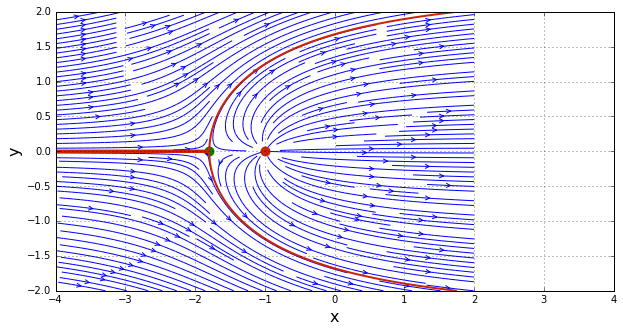

In [18]:
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source


size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculates the stagnation point
x_stagnation = x_source - strength_source/(2*numpy.pi*u_inf)
y_stagnation = y_source

# adding the stagnation point to the figure
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# adds the dividing line to the figure
pyplot.contour(X, Y, psi, 
            levels=[-strength_source/2, +strength_source/2], 
            colors='#CD2305', linewidths=2, linestyles='solid');

In [19]:
strength_sink = -5.0
x_sink, y_sink = 1.0, 0.0

u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

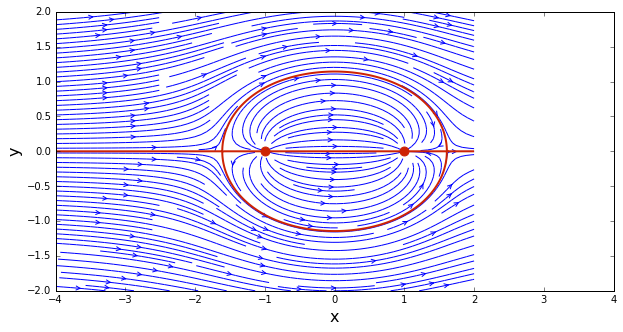

In [20]:
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

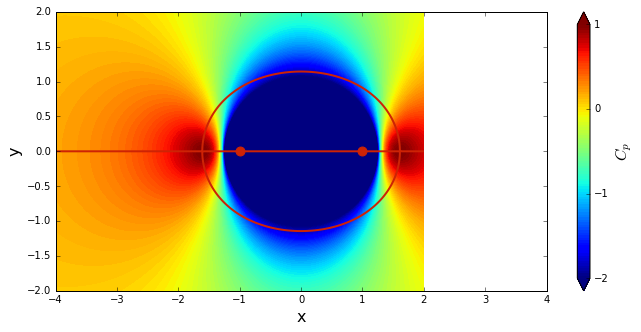

In [21]:
cp = 1.0 - (u**2+v**2)/u_inf**2

size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');